In [ ]:
##Tarea 2##

##Módulos##

import math
import numpy as np
import random
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from scipy.stats import exponweib
from scipy.stats import wrapcauchy

import pandas as pd


from scipy.stats import levy_stable



Clases

In [ ]:
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
    and also provides a bunch of high level functions
    """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    #addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    #Vector lenght
    def get_enght(self):
      return math.sqrt(self.x**2 + self.y**2)

    #rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

**Parte 1: Distribución Levy - N Curves**

In [ ]:
#Miu requerimiento
miu = 3.0
s_pos=0

#arreglo de exponentes
Levy_exponent=[0.2, 0.5, 1.0, 1.9]

#beta en requerimiento
beta = 0.0

#tamanyo arreglo
n_steps=400
listaDistlevy=[]

#definir e inicializar arreglos
listaDistLevy=np.ones(shape=( 4,n_steps))*s_pos

aux_domain = np.linspace(miu-5, miu+5, n_steps)
posicionI=0
for i in Levy_exponent :
  Levy_pdf=np.array([levy_stable.pdf(ii, alpha=i, beta=beta, loc=miu) for ii in aux_domain])
  listaDistLevy[posicionI]=Levy_pdf
  posicionI=posicionI+1

fig_levy_pdf=go.Figure()
contadorLeyenda=0
for iii in listaDistLevy:
  #print(iii)
  fig_levy_pdf.add_trace(go.Scatter(    x=aux_domain,
                                        y= iii,
                                        marker= dict(size=2),
                                        line= dict(width=2),
                                        mode= 'lines',
                                        name= 'Levy '+str(Levy_exponent[contadorLeyenda]),
                                        showlegend= True))
  contadorLeyenda=contadorLeyenda+1
fig_levy_pdf.show()

**Actividad 2: Levy distribucion e histograma**


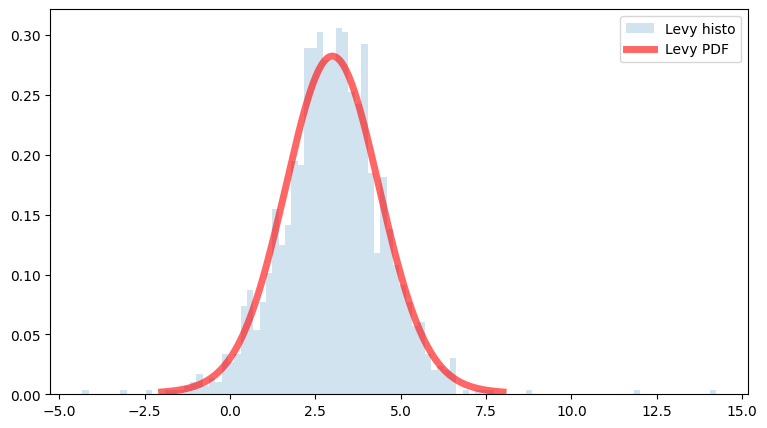

In [ ]:
miu = 3.0
s_pos=0
Levy_exponent=1.9
beta = 0.0
n_steps=1600

distribucion=levy_stable(alpha=Levy_exponent, beta=beta, loc=miu)
aux_domain = np.linspace(miu-5, miu+5, 400)
listaRadonLevy=distribucion.rvs(size=n_steps)
levy_pdf = np.array([distribucion.pdf(i)for i in aux_domain])

fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(9)

ax.hist(listaRadonLevy, bins=100, density=True, histtype='stepfilled', alpha=0.2, label='Levy histo')
ax.plot(aux_domain, levy_pdf, 'r-', lw=5, alpha=0.6, label= 'Levy PDF')
ax.legend()
plt.show()

**Actividad 3 Levy flight 1 trayectoria**

In [ ]:
n_steps = 35000
speed = 1
s_pos = [0,0,0]
miu = 5.0
Levy_exponent=0.9
beta = 1.0

#hacer instancia Vec2d
velocity = Vec2d(speed,0)

#crear instancia objeto Wrapcauchy
distribucionDireccion = wrapcauchy(0.4,0,scale=1)

#giros para trayectoria
listaDirecciones = distribucionDireccion.rvs(size=n_steps)

#crear instancia de objeto levy_stable
distribucionPasos=levy_stable(alpha=Levy_exponent, beta=beta, loc=miu)

#se obtienen los pasos que se toman para 1 trayectoria
listaCantidadPasos=distribucionPasos.rvs(size=n_steps)

#printLista direcciones y pasos
pdLevy = pd.DataFrame(columns=['x_pos', 'y_pos', 'z_pos'])
temp3d = pd.DataFrame([{'x_pos':s_pos[0],'y_pos':s_pos[1], 'z_pos':s_pos[2]}])
pdLevy = pd.concat([pdLevy,temp3d], ignore_index=True)
PasosPendientes=0
IndicePasos = 0
IndiceCambiosDireccion = 0
for i in range(n_steps-1):
  if PasosPendientes < 1 :
    velocity=velocity.rotated(listaDirecciones[IndiceCambiosDireccion])
    IndiceCambiosDireccion=IndiceCambiosDireccion + 1
    temp3d = pd.DataFrame([{'x_pos':pdLevy.x_pos[i]+velocity.x,'y_pos':pdLevy.y_pos[i]+velocity.y,'z_pos':pdLevy.z_pos[i]+1}])
    pdLevy = pd.concat([pdLevy, temp3d], ignore_index=True)
    PasosPendientes=int(listaCantidadPasos[IndicePasos])

    #Print('PasosPorCaminar'+str(PasosPendientes)+'Indice;'str(IndicePasos))
    IndicePasos=IndicePasos+1

    #Print('Pasos por caminar' +str(PasosPendientes)+ 'indice:'+str(IndicePasos))
  else:

    #Velocity=velocity.rotated(0)
    temp3d = pd.DataFrame([{'x_pos':pdLevy.x_pos[i]+velocity.x,'y_pos':pdLevy.y_pos[i]+velocity.y,'z_pos':pdLevy.z_pos[i]+1}])
    pdLevy = pd.concat([pdLevy, temp3d], ignore_index=True)
    PasosPendientes=PasosPendientes-1


fig2 = go.Figure(data =[go.Scatter3d(x= pdLevy.x_pos,
                                    y = pdLevy.y_pos,
                                    z = pdLevy.z_pos,
                                    marker=dict(size=2),
                                    line = dict(width=2),
                                    mode = 'lines',
                                    name = 'Levy Flight 3D',
                                    showlegend = True)])

fig2.show()

print(listaCantidadPasos)



[22.65708806 11.29987315  9.73060974 ... 15.53322885 11.59372586
 12.73254114]


**Actividad 4 Caminatas aleatorias correlacionadas - Vec2d n trayectorias**

In [ ]:
##Variable de control para definir número de trayectorias##

CantidadTrayectorias = 5

# random float from 0.1 to 0.95
# crear factores cauchy

integer_list = random.sample(range(0, 100), CantidadTrayectorias)
FactoresCauchy = [x/100 for x in integer_list]
print(FactoresCauchy)

# Variables de control de pasos, inicio y velocidad

n_steps = 1000
speed = 5
s_pos = [0,0,0]

# usando clase Vec2d
velocity = Vec2d(speed,0)

# Dataframes pandas
ListaPDTrayectorias = []

#por cada trayectoria
for i in range (0, CantidadTrayectorias):
  distribucionDireccion = wrapcauchy(FactoresCauchy[i],0,scale=1)

  # obtención de direcciones aleatorio
  listaDirecciones = distribucionDireccion.rvs(size=n_steps)
  pdLevy = pd.DataFrame(columns=['x_pos', 'y_pos', 'z_pos'])

  # Guardar dataframe
  temp3d = pd.DataFrame([{'x_pos':s_pos[0], 'y_pos':s_pos[1], 'z_pos':s_pos[2]}])
  pdLevy = pd.concat([pdLevy,temp3d], ignore_index=True)

  # Calcular trayectorias con los pasos
  for ii in range(n_steps-1):
    velocity=velocity.rotated(listaDirecciones[ii])
    temp3d = pd.DataFrame([{'x_pos':pdLevy.x_pos[ii]+velocity.x, 'y_pos':pdLevy.y_pos[ii]+velocity.y, 'z_pos':pdLevy.z_pos[ii]+1}])
    pdLevy = pd.concat([pdLevy, temp3d], ignore_index=True)
  ListaPDTrayectorias.append(pdLevy)

# Print ListaPDTrayectorias

fig2=go.Figure()

#Grupo de trayectorias

for i in range(0,CantidadTrayectorias):
  fig2.add_trace(go.Scatter3d(x= ListaPDTrayectorias[i].x_pos,
                                  y = ListaPDTrayectorias[i].y_pos,
                                  z = ListaPDTrayectorias[i].z_pos,
                                  marker=dict(size=2),
                                  line = dict(width=2),
                                  mode = 'lines',
                                  name = 'Cauchy Factor: '+str(FactoresCauchy[i]),
                                  showlegend = True))

